# Trabalho Pr√°tico 3 - Fase 3

- Janderson Glauber Mendes dos Santos - 2020054544

O objetivo desta fase 3 √© consolidar os resultados obtidos na etapa 2 utilizando os conhecimentos obtidos ao longo do semestre. Dado que a parte de an√°lise e prepara√ß√£o dos dados se demonstrou s√≥lida durante o desenvolvimento da segunda fase, o objetivo √© melhorar os resultados dos agrupamentos no contexto aplicado.


## Business Understanding

### Objetivo do Dataset

O dataset escolhido (dispon√≠vel em https://www.kaggle.com/datasets/antonkozyriev/game-recommendations-on-steam?select=recommendations.csv) cont√©m informa√ß√µes sobre mais de 41 milh√µes de an√°lises de produtos realizadas na plataforma Steam, que √© uma das maiores plataformas de distribui√ß√£o de software focada em jogos e expans√µes.

Este dataset pode ser utilizado para agrupar os jogos dispon√≠veis da plataforma em conjuntos com caracter√≠sticas comuns, que pode permitir uma an√°lise do mercado da plataforma Steam sob a perspectiva da an√°lise de dados.

### Origem dos dados

Os dados foram coletados de um dataset presente no Kaggle, que √© um reposit√≥rio online de datasets de todo tipo de dado, coletado por um pesquisador ucraniano. Os dados foram coletados da loja oficial da Steam utilizando t√©cnicas de webscraping. Ele cont√©m informa√ß√µes sobre an√°lises de produtos da plataforma desde de 15 de Outubro de 2010 at√© 31 de Dezembro de 2022, contendo informa√ß√µes sobre as an√°lises, sobre os jogos analisados e sobre o perfil dos usu√°rios autores das an√°lises. Neste trabalho o foco ser√° nos dados relacionados √†s caacter√≠sticas dos jogos, ou seja, nos dados que cont√©m informa√ß√µes sobre os jogos e n√£o sobre as an√°lises em si.

### Caracter√≠sticas do Dataset

O dataset em quest√£o √© dividido em 3 arquivos principais: "games.csv", "recommendations.csv", e "users.csv" , e um arquivo auxiliar 'games_metadata.json' que ser√£o detalhados nas pr√≥ximas subsess√µes.

#### "games.csv"

Este arquivo cont√©m as informa√ß√µes de cada um dos jogos dos quais alguma avalia√ß√£o foi coletada pelo autor do dataset, ou seja, √© um dataset com as informa√ß√µes detalhadas de cada um dos jogos que representam uma amostra de todos os jogos dispon√≠veis na plataforma. Dentre as informa√ß√µes contidas sobre cada jogo est√£o: t√≠tulo, data de lan√ßamento, plataformas dispon√≠veis, rating, raz√£o de avalia√ß√µes positivas, n√∫mero de reviews e pre√ßo.

#### "users.csv"

Este arquivo cont√©m informa√ß√µes sobre os usu√°rios que realizaram as avalia√ß√µes que foram coletadas pelo autor. Sendo assim, para cada us√°rio coletado, cont√©m informa√ß√µes como o n√∫mero de produtos adquiridos e n√∫mero de reviews realizadas pelo usu√°rio.

#### "recommendations.csv"

Este arquivo cont√©m a informa√ß√£o alvo do desenvolvimento do dataset que s√£o as informa√ß√µes relativas √†s avalia√ß√µes dos jogos que foram coletadas do site oficial da plataforma Steam. Para cada uma das avalia√ß√µes cont√©m dados como, usu√°rio que avaliou, jogo avaliado, quantidade de usu√°rios que considerou a avalia√ß√£o √∫til, quantidade de usu√°rios que achou a avalia√ß√£o divertida, data da avalia√ß√£o, informa√ß√£o sobre a recomenda√ß√£o ou n√£o do jogo pelo usu√°rio autor da avalia√ß√£o e o n√∫mero de horas que o usu√°rio jogou o jogo avaliado.

#### 'games_metadata.json'

Este arquivo cont√©m mais informa√ß√µes sobre os jogos, especificamente a descri√ß√£o do jogo na plataforma e as tags associadas ao jogo. Juntamente com o arquivo 'games.csv' ser√° um dos principais arquivos para o desenvolvimento do projeto.

### Rela√ß√£o com o Problema de Neg√≥cio

A base de dados escolhida cont√©m diversas informa√ß√µes sobre an√°lises de jogos dispon√≠veis na plataforma Steam. A Steam √© um plataforma de distribui√ß√£o de software focada em jogos, ou seja, √© uma loja virtual, principalmente, de jogos que funciona como uma prateleira para os est√∫dios de desenvolvimento de jogos para seus produtos. Ela √© uma das maiores plataformas de jogos online e cont√©m tamb√©m fun√ß√µes que remetem √† uma rede social, criando uma forma de intera√ß√£o entre a comunidade.
Dentre deste contexto, os usu√°rios da plataforma s√£o capazes de avaliar todos os softwares que tenham adquirido de forma p√∫blica no ambiente comunit√°rio da Steam. Pensando nisso, o autor da base de dados escolhida extraiu diversos dados relativos a essas an√°lises que est√£o presentes no site oficial da plataforma Steam. Com esses dados, diversas tarefas podem ser resolvidas para resolver problemas que surgem nesse contexto. Neste projeto, utilizaremos estes dados para gerar conjuntos dentre os jogos dispon√≠veis na plataforma com base nos dados dispon√≠veis sobre cada um deles, de forma a entender melhor quais s√£o os padr√µes de jogos disponibilizados na plataforma, como a comunidade reage a cada um desses padr√µes e outras informa√ß√µes relevantes que possam surgir.

## Data Understanding & Data Preparation

### Data Understanding


Para esta etapa focaremos em realizar a an√°lise explorat√≥ria dos dados relativos aos jogos, concentrando, portanto, as an√°lises nos arquivos 'games.csv' e 'games_metadata.json'

#### Explora√ß√£o inicial

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Analisando inicialmente formato dos dados

In [ ]:
df = pd.read_csv('games.csv')
# recomenda√ß√£o LLM: print(df.shape)
print("N√∫mero de Atributos por jogo: ", df.shape[1])
print("N√∫mero de Jogos: ", df.shape[0])
df.head()

N√∫mero de Atributos por jogo:  13
N√∫mero de Jogos:  50872


app_id                              title date_release   win    mac  linux  \
0   13500  Prince of Persia: Warrior Within‚Ñ¢   2008-11-21  True  False  False   
1   22364            BRINK: Agents of Change   2011-08-03  True  False  False   
2  113020       Monaco: What's Yours Is Mine   2013-04-24  True   True   True   
3  226560                 Escape Dead Island   2014-11-18  True  False  False   
4  249050            Dungeon of the ENDLESS‚Ñ¢   2014-10-27  True   True  False   

          rating  positive_ratio  user_reviews  price_final  price_original  \
0  Very Positive              84          2199         9.99            9.99   
1       Positive              85            21         2.99            2.99   
2  Very Positive              92          3722        14.99           14.99   
3          Mixed              61           873        14.99           14.99   
4  Very Positive              88          8784        11.99           11.99   

   discount  steam_deck  
0       0.0        True  
1       0.0        True  
2       0.0        True  
3       0.0        True  
4       0.0        True

Analisando tipo dos dados

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50872 entries, 0 to 50871
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          50872 non-null  int64  
 1   title           50872 non-null  object 
 2   date_release    50872 non-null  object 
 3   win             50872 non-null  bool   
 4   mac             50872 non-null  bool   
 5   linux           50872 non-null  bool   
 6   rating          50872 non-null  object 
 7   positive_ratio  50872 non-null  int64  
 8   user_reviews    50872 non-null  int64  
 9   price_final     50872 non-null  float64
 10  price_original  50872 non-null  float64
 11  discount        50872 non-null  float64
 12  steam_deck      50872 non-null  bool   
dtypes: bool(4), float64(3), int64(3), object(3)
memory usage: 3.7+ MB


Adaptando dados para tipos de dados mais adequados

In [ ]:
df['title'] = df['title'].astype(str)
df['date_release'] = pd.to_datetime(df['date_release'])
df['rating'] = df['rating'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50872 entries, 0 to 50871
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   app_id          50872 non-null  int64         
 1   title           50872 non-null  object        
 2   date_release    50872 non-null  datetime64[ns]
 3   win             50872 non-null  bool          
 4   mac             50872 non-null  bool          
 5   linux           50872 non-null  bool          
 6   rating          50872 non-null  object        
 7   positive_ratio  50872 non-null  int64         
 8   user_reviews    50872 non-null  int64         
 9   price_final     50872 non-null  float64       
 10  price_original  50872 non-null  float64       
 11  discount        50872 non-null  float64       
 12  steam_deck      50872 non-null  bool          
dtypes: bool(4), datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 3.7+ MB


Por meio da tabela √© poss√≠vel reconhecer a inexist√™ncia de valores nulos da tabela, removendo a necessidade do tratamento dos dados nesse sentido.

An√°lise dos dados num√©ricos relevantes:


In [ ]:
df[['positive_ratio','user_reviews','price_final','price_original','discount']].describe()

positive_ratio  user_reviews   price_final  price_original  \
count    50872.000000  5.087200e+04  50872.000000    50872.000000   
mean        77.052033  1.824425e+03      8.620325        8.726788   
std         18.253592  4.007352e+04     11.514164       11.507021   
min          0.000000  1.000000e+01      0.000000        0.000000   
25%         67.000000  1.900000e+01      0.990000        0.990000   
50%         81.000000  4.900000e+01      4.990000        4.990000   
75%         91.000000  2.060000e+02     10.990000       11.990000   
max        100.000000  7.494460e+06    299.990000      299.990000   

           discount  
count  50872.000000  
mean       5.592212  
std       18.606679  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max       90.000000

Por meio da tabela criada √© poss√≠vel notar informa√ß√µes interessantes sobre os jogos da plataforma, como por exemplo o fato de que o pre√ßo m√©dio dos jogos √© baixo (\$ 8.72), por√©m o desvio padr√£o √© alto para este dado, demonstrando grande variabilidade nos valores dos jogos. Outro fator importante √©, por exemplo, que a maioria dos jogos tem pre√ßo baixo, sendo 75% deles com valores de at√© \$ 11, por√©m com um pre√ßo m√°ximo alto de $ 299.99. Al√©m disso, no momento da coleta dos dados a maioria dos jogos n√£o tinha nenhum disconto no pre√ßo, mesmo que a m√©dia seja consider√°vel (\$ 5.59). Em rela√ß√£o √†s avalia√ß√µes, h√° uma quantidade m√©dia de avalia√ß√µes consider√°vel por jogos, por volta de 2000 avalia√ß√µes por jogo, sendo que dos jogos coletados o que teve menos avalia√ß√µes teve 10 avalia√ß√µes, al√©m disso, a taxa de avalia√ß√µes positivas √©, em m√©dia, significativamente alta (77.05%).

An√°lises dos dados categ√≥ricos relevantes:

In [ ]:
df[['win', 'mac','linux','rating','steam_deck']].describe()

win    mac  linux    rating steam_deck
count   50872  50872  50872     50872      50872
unique      2      2      2         9          2
top      True  False  False  Positive       True
freq    50076  37854  41831     13502      50870

Por meio da tabela acima √© poss√≠vel notar que a maior parte dos jogos coletados est√£so dispon√≠veis apenas para o windows, sendo o linux o sistema operacional com a menor quantidade de jogos dispon√≠veis. Al√©m disso, a categoria de avalia√ß√£o mais comum dentre os jogos √© 'Positive'. Outra informa√ß√£o relevante √© que a plataforma com maior suporte aos jogos √© o console da pr√≥pria plataforma (steam deck).

Analisando completude dos dados:

In [ ]:
df.isnull().sum()


app_id            0
title             0
date_release      0
win               0
mac               0
linux             0
rating            0
positive_ratio    0
user_reviews      0
price_final       0
price_original    0
discount          0
steam_deck        0
dtype: int64

#### An√°lise Visual

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


Analisando ano de lan√ßamento dos jogos:


Text(0, 0.5, 'N√∫mero de Jogos')

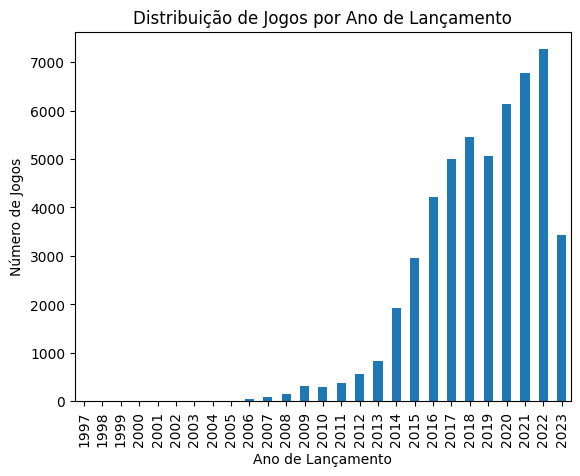

In [ ]:
year_counts = df['date_release'].dt.year.value_counts()
year_counts.sort_index(ascending=True).plot(kind='bar')
plt.title('Distribui√ß√£o de Jogos por Ano de Lan√ßamento')
plt.xlabel('Ano de Lan√ßamento')
plt.ylabel('N√∫mero de Jogos')

Pelo gr√°fico √© poss√≠vel notar um aumento no n√∫mero de jogos lan√ßados a cada ano com o tempo com poucos casos em que o n√∫mero de anos de um ano foi menor que o ano anterior.

Analisando disponibilidade dos jogos nas plataformas (Sistemas Operacionais e steamdeck):

Text(0.5, 0, 'Plataforma')

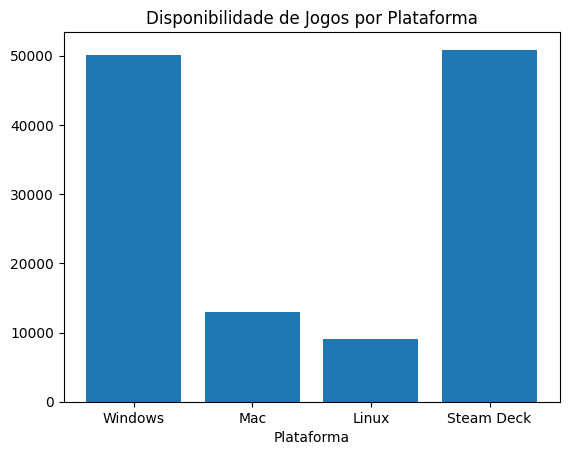

In [ ]:
avaibility_dict = {
    'Windows': df['win'].sum(),
    'Mac': df['mac'].sum(),
    'Linux': df['linux'].sum(),
    'Steam Deck': df['steam_deck'].sum()
}

plt.bar(avaibility_dict.keys(), avaibility_dict.values())
plt.title('Disponibilidade de Jogos por Plataforma')
plt.xlabel('Plataforma')

Por meio do gr√°fico aciam √© poss√≠vel consolidar a ideia j√° abordada anteriormente de que as plataformas que apresentam maior suporte para os jogos s√£o Windows e Steam Deck.

Analisando evolu√ß√£o dos pre√ßos dos jogos ao longo dos anos:

Text(0, 0.5, 'Pre√ßo M√©dio dos Jogos')

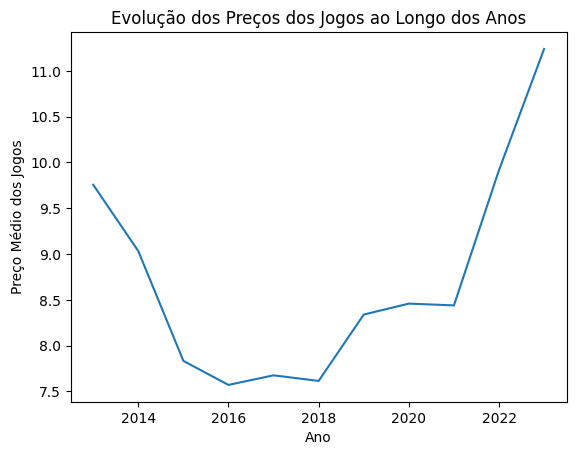

In [ ]:
df['year'] = df['date_release'].dt.year
df_recent = df[df['year']>=2013]
df_recent.groupby('year')['price_final'].mean().plot(kind='line')
plt.title('Evolu√ß√£o dos Pre√ßos dos Jogos ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Pre√ßo M√©dio dos Jogos')

O gr√°fico acima mostra a evolu√ß√£o do pre√ßo m√©dio dos jogos a partir de 2013 (dado que para os dados em quest√£o a quantidade de jogos coletados de anos anteriores foi pequena o que poderia enviezar a an√°lise). Com esta visualiza√ß√£o √© poss√≠vel notar que de 2013 a 2018 houve uma queda no pre√ßo m√©dio dos jogos, por√©m a partir de 2018 esse valor come√ßou a subir, at√© que em 2021 esses valores foram elevados de forma abrupta levando ao maior pre√ßo m√©dio considerando o tempo analisado.

#### Insights sobre os dados

Analisando distribui√ß√£o das 20 tags mais populares:

In [ ]:
import json

valid_lines = []
with open('games_metadata.json', 'r', encoding='utf-8') as f:
    for i, line in enumerate(f, 1):
        try:
            valid_lines.append(json.loads(line))
        except json.JSONDecodeError as e:
            print(f"Linha {i} inv√°lida: {e}")

import pandas as pd
df_metadata = pd.DataFrame(valid_lines)


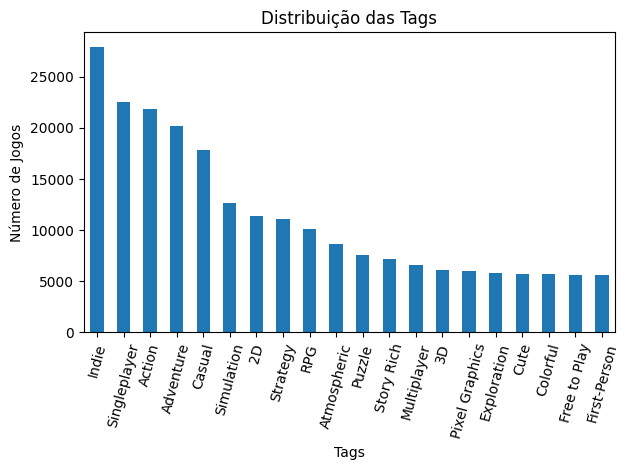

In [ ]:
import matplotlib.pyplot as plt

df_tags = df_metadata[['app_id','tags']].explode('tags')
df_tags['tags'].value_counts().sort_values(ascending=False).head(20).plot(kind='bar')

plt.title('Distribui√ß√£o das Tags')
plt.xlabel('Tags')
plt.ylabel('N√∫mero de Jogos')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()


Analisando correla√ß√£o entre n√∫mero de jogos indies lan√ßados e pre√ßo m√©dio dos jogos ao longo dos anos(2013 - Atual):

In [ ]:
import numpy as np
df_indie = df_metadata[df_metadata['tags'].apply(lambda x: 'Indie' in x)]
df_indie = df_indie.join(df.set_index('app_id'), on='app_id')
df_indie['year'] = df_indie['date_release'].dt.year
df_indie = df_indie[df_indie['year']>=2013]

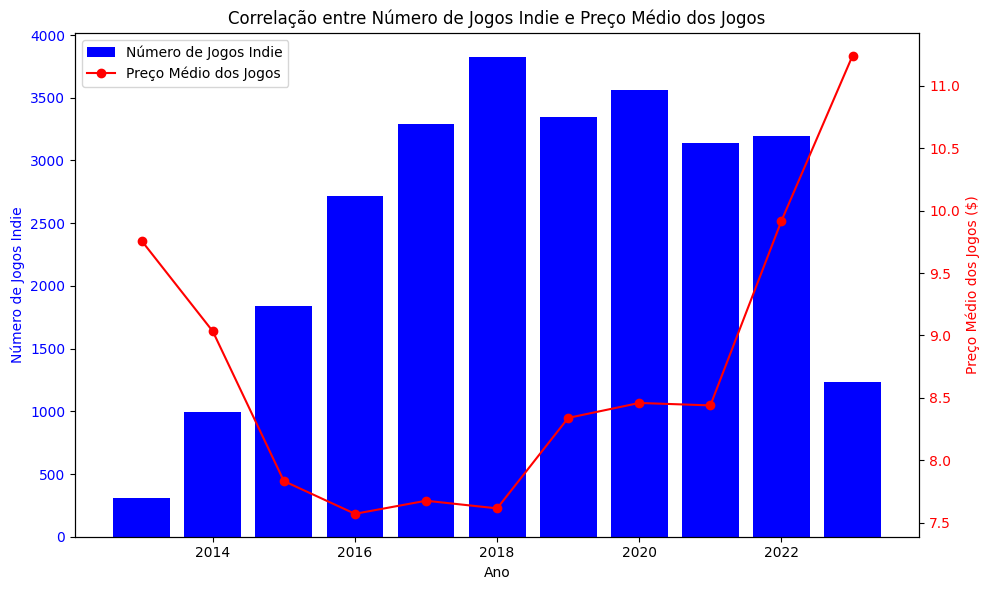

In [ ]:
# Preparar os dados
index = df_indie.groupby('year')['price_final'].count().index
values_num_indies = df_indie.groupby('year')['price_final'].count().values
values_price = df_recent.groupby('year')['price_final'].mean().values

# Criar figura e eixo principal
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gr√°fico de barras no eixo da esquerda (n√∫mero de jogos indie)
ax1.bar(index, values_num_indies, color='blue', label='N√∫mero de Jogos Indie')
ax1.set_xlabel('Ano')
ax1.set_ylabel('N√∫mero de Jogos Indie', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Eixo secund√°rio √† direita
ax2 = ax1.twinx()
ax2.plot(index, values_price, color='red', marker='o', label='Pre√ßo M√©dio dos Jogos')
ax2.set_ylabel('Pre√ßo M√©dio dos Jogos ($)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# T√≠tulo e legendas
plt.title('Correla√ß√£o entre N√∫mero de Jogos Indie e Pre√ßo M√©dio dos Jogos')

# Legendas combinadas
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.tight_layout()
plt.show()

Podemos ver por meio do gr√°fico acima que o aumento no n√∫mero de jogos indie lan√ßados coincide com a diminui√ß√£o no pre√ßo m√©dio dos jogos, com excess√£o para os anos a partir de 2021, nos quais mesmo com muitos jogos desta categoria sendo lan√ßados ainda houve um aumento no pre√ßo m√©dio dos jogos.

### Data Preparation

#### Limpeza dos dados


In [ ]:
df = pd.read_csv('games.csv')

In [ ]:
df = df.drop_duplicates(subset=['app_id'])

In [ ]:
df['title'] = df['title'].astype(str)
df['date_release'] = pd.to_datetime(df['date_release'])
df['rating'] = df['rating'].astype(str)
df['year'] = df['date_release'].dt.year

#### Transforma√ß√£o dos dados

In [ ]:
import json

valid_lines = []
with open('games_metadata.json', 'r', encoding='utf-8') as f:
    for i, line in enumerate(f, 1):
        try:
            valid_lines.append(json.loads(line))
        except json.JSONDecodeError as e:
            print(f"Linha {i} inv√°lida: {e}")

import pandas as pd
df_metadata = pd.DataFrame(valid_lines)


In [ ]:
df_metadata

app_id                                        description  \
0        13500  Enter the dark underworld of Prince of Persia ...   
1        22364                                                      
2       113020  Monaco: What's Yours Is Mine is a single playe...   
3       226560  Escape Dead Island is a Survival-Mystery adven...   
4       249050  Dungeon of the Endless is a Rogue-Like Dungeon...   
...        ...                                                ...   
50867  2296380                                                      
50868  1272080                                                      
50869  1402110                                                      
50870  2272250  Embark on a journey into the darkest nightmare...   
50871  2488510                                                      

                                                    tags  
0      [Action, Adventure, Parkour, Third Person, Gre...  
1                                               [Action]  
2      [Co-op, Stealth, Indie, Heist, Local Co-Op, St...  
3      [Zombies, Adventure, Survival, Action, Third P...  
4      [Roguelike, Strategy, Tower Defense, Pixel Gra...  
...                                                  ...  
50867                                                 []  
50868                                                 []  
50869                                                 []  
50870  [Early Access, FPS, Action, Retro, First-Perso...  
50871                                                 []  

[50872 rows x 3 columns]

Durante esta etapa, aplicamos o one-hot encoding √† coluna de tags, o que resultou em mais de 400 novas vari√°veis. Essa alta dimensionalidade teve um impacto significativo nos algoritmos de clusteriza√ß√£o, dificultando a identifica√ß√£o de estruturas claras nos dados e resultando em valores de Silhouette Score pouco representativos. Para contornar esse problema e explorar melhor os padr√µes do conjunto de dados, optamos por realizar a clusteriza√ß√£o inicialmente sem as tags. Posteriormente, pretendemos reintegrar essas vari√°veis ao modelo, aplicar novamente os algoritmos de clusteriza√ß√£o e comparar os resultados com e sem o uso das tags.

In [ ]:
# # df_metadata = pd.read_json('games_metadata.json', lines=True)
# df_tags = df_metadata[['app_id','tags']].explode('tags')
# one_hot_tags = pd.get_dummies(df_tags['tags'])
# one_hot_tags = df_tags[['app_id']].join(one_hot_tags)
# one_hot_encoded = one_hot_tags.groupby('app_id').max().reset_index()
# one_hot_encoded


In [ ]:
temp_df = df[['app_id','rating']]
df_rating = temp_df[['app_id','rating']].explode('rating')
one_hot_ratings = pd.get_dummies(df_rating['rating'])
one_hot_ratings = df_rating[['app_id']].join(one_hot_ratings)
one_hot_encoded_rating = one_hot_ratings.groupby('app_id').max().reset_index()
one_hot_encoded_rating

app_id  Mixed  Mostly Negative  Mostly Positive  Negative  \
0           10  False            False            False     False   
1           20  False            False            False     False   
2           30  False            False            False     False   
3           40  False            False             True     False   
4           50  False            False            False     False   
...        ...    ...              ...              ...       ...   
50867  2581740   True            False            False     False   
50868  2585630  False            False            False     False   
50869  2585640  False            False             True     False   
50870  2593020   True            False            False     False   
50871  2599300  False            False            False     False   

       Overwhelmingly Negative  Overwhelmingly Positive  Positive  \
0                        False                     True     False   
1                        False                    False     False   
2                        False                    False     False   
3                        False                    False     False   
4                        False                     True     False   
...                        ...                      ...       ...   
50867                    False                    False     False   
50868                    False                    False     False   
50869                    False                    False     False   
50870                    False                    False     False   
50871                    False                    False     False   

       Very Negative  Very Positive  
0              False          False  
1              False           True  
2              False           True  
3              False          False  
4              False          False  
...              ...            ...  
50867          False          False  
50868          False           True  
50869          False          False  
50870          False          False  
50871          False           True  

[50872 rows x 10 columns]

In [ ]:
# games_relevant_columns = ['app_id','win','mac','linux','positive_ratio','user_reviews','price_final','price_original','discount','steam_deck','year']
games_relevant_columns = ['app_id','positive_ratio','user_reviews','price_final','price_original','discount']
final_df = df[games_relevant_columns]
# final_df = final_df.merge(one_hot_encoded, on='app_id', how='inner')
final_df = final_df.merge(one_hot_encoded_rating, on='app_id', how='inner')
final_df

app_id  positive_ratio  user_reviews  price_final  price_original  \
0        13500              84          2199         9.99            9.99   
1        22364              85            21         2.99            2.99   
2       113020              92          3722        14.99           14.99   
3       226560              61           873        14.99           14.99   
4       249050              88          8784        11.99           11.99   
...        ...             ...           ...          ...             ...   
50867  2296380              96           101        22.00            0.00   
50868  1272080              38         29458        40.00            0.00   
50869  1402110              89          1128        30.00            0.00   
50870  2272250              95            82        17.00            0.00   
50871  2488510              88           144         4.00            0.00   

       discount  Mixed  Mostly Negative  Mostly Positive  Negative  \
0           0.0  False            False            False     False   
1           0.0  False            False            False     False   
2           0.0  False            False            False     False   
3           0.0   True            False            False     False   
4           0.0  False            False            False     False   
...         ...    ...              ...              ...       ...   
50867       0.0  False            False            False     False   
50868       0.0  False             True            False     False   
50869       0.0  False            False            False     False   
50870       0.0  False            False            False     False   
50871       0.0  False            False            False     False   

       Overwhelmingly Negative  Overwhelmingly Positive  Positive  \
0                        False                    False     False   
1                        False                    False      True   
2                        False                    False     False   
3                        False                    False     False   
4                        False                    False     False   
...                        ...                      ...       ...   
50867                    False                    False     False   
50868                    False                    False     False   
50869                    False                    False     False   
50870                    False                    False     False   
50871                    False                    False     False   

       Very Negative  Very Positive  
0              False           True  
1              False          False  
2              False           True  
3              False          False  
4              False           True  
...              ...            ...  
50867          False           True  
50868          False          False  
50869          False           True  
50870          False           True  
50871          False           True  

[50872 rows x 15 columns]

In [ ]:
final_df.head()

app_id  positive_ratio  user_reviews  price_final  price_original  \
0   13500              84          2199         9.99            9.99   
1   22364              85            21         2.99            2.99   
2  113020              92          3722        14.99           14.99   
3  226560              61           873        14.99           14.99   
4  249050              88          8784        11.99           11.99   

   discount  Mixed  Mostly Negative  Mostly Positive  Negative  \
0       0.0  False            False            False     False   
1       0.0  False            False            False     False   
2       0.0  False            False            False     False   
3       0.0   True            False            False     False   
4       0.0  False            False            False     False   

   Overwhelmingly Negative  Overwhelmingly Positive  Positive  Very Negative  \
0                    False                    False     False          False   
1                    False                    False      True          False   
2                    False                    False     False          False   
3                    False                    False     False          False   
4                    False                    False     False          False   

   Very Positive  
0           True  
1          False  
2           True  
3          False  
4           True

## Modeling

Para este trabalho, optamos por explorar dois algoritmos de clusteriza√ß√£o: K-Means e DBSCAN.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

Remo√ß√£o da coluna app_id pois n√£o influ√™ncia na an√°lise dos dados

In [ ]:
X = final_df.drop(columns=['app_id'])

Executamos a normaliza√ß√£o dos dados para que valores muito discrepantes n√£o gerassem um enviesamento muito brusco

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

O c√≥digo abaixo apresenta a aplica√ß√£o do PCA (An√°lise de Componentes Principais) para a redu√ß√£o de dimensionalidade do dataset. No entanto, observa-se que, para reter uma parcela significativa da vari√¢ncia explicada, √© necess√°rio manter um n√∫mero elevado de componentes principais ‚Äî pr√≥ximo da dimensionalidade original do conjunto de dados. Isso indica que a vari√¢ncia est√° bastante dispersa entre as vari√°veis e que a estrutura dos dados √© intrinsecamente de alta dimensionalidade.

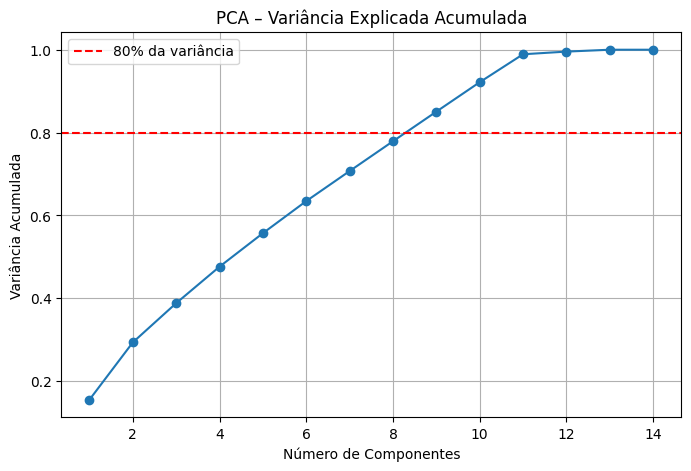

In [ ]:
pca_full = PCA().fit(X_scaled)
explained_var = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_var) + 1), explained_var, marker='o')
plt.axhline(y=0.8, color='r', linestyle='--', label='80% da vari√¢ncia')
plt.xlabel('N√∫mero de Componentes')
plt.ylabel('Vari√¢ncia Acumulada')
plt.title('PCA ‚Äì Vari√¢ncia Explicada Acumulada')
plt.grid(True)
plt.legend()
plt.show()

Aplicando o PCA para 10 dimens√µes, o ideal para garantir pelo menos 90% de variancia

In [ ]:
pca_290 = PCA(n_components= 10, random_state=42)
X_pca_290 = pca_290.fit_transform(X_scaled)
total_var = pca_290.explained_variance_ratio_.sum()
print(f"Vari√¢ncia total explicada com 10 componentes: {total_var:.4f} ({total_var*100:.2f}%)")


Vari√¢ncia total explicada com 10 componentes: 0.9216 (92.16%)


Agora aplicamos os algoritmos de clusteriza√ß√£o. Embora o PCA tenha sido utilizado para reduzir a dimensionalidade, o n√∫mero de componentes ainda se manteve relativamente alto. Por isso, realizamos testes comparativos para avaliar se a utiliza√ß√£o do novo conjunto de dados transformado pelo PCA traria resultados superiores em rela√ß√£o aos dados originais. Al√©m disso, foram testados diversos valores de k no K-Means, sendo o melhor resultado obtido com k = 14 clusters.

Como conclus√£o, observamos que o uso do PCA melhorou levemente a qualidade da clusteriza√ß√£o, refletido por um aumento no Silhouette Score. Isso ocorre porque o PCA √© eficaz na remo√ß√£o de ru√≠do e redund√¢ncia, tornando o espa√ßo de dados mais compacto e informativo. Ao projetar os dados nas dire√ß√µes de maior vari√¢ncia, o PCA facilita a separa√ß√£o entre os grupos, o que beneficia algoritmos baseados em dist√¢ncia como o K-Means.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# A. K-Means com os dados originais
k = 10
kmeans_original = KMeans(n_clusters=k, random_state=42, n_init='auto')
labels_original = kmeans_original.fit_predict(X_scaled)
sil_original = silhouette_score(X_scaled, labels_original)
print(f"[ORIGINAL] Silhouette Score com k={k}: {sil_original:.4f}")

# B. K-Means com os dados reduzidos por PCA
kmeans_pca = KMeans(n_clusters=k, random_state=42, n_init='auto')
labels_pca_k_means = kmeans_pca.fit_predict(X_pca_290)
sil_pca = silhouette_score(X_pca_290, labels_pca_k_means)
print(f"[PCA-290]  Silhouette Score com k={k}: {sil_pca:.4f}")

[ORIGINAL] Silhouette Score com k=10: 0.5974
[PCA-290]  Silhouette Score com k=10: 0.6263


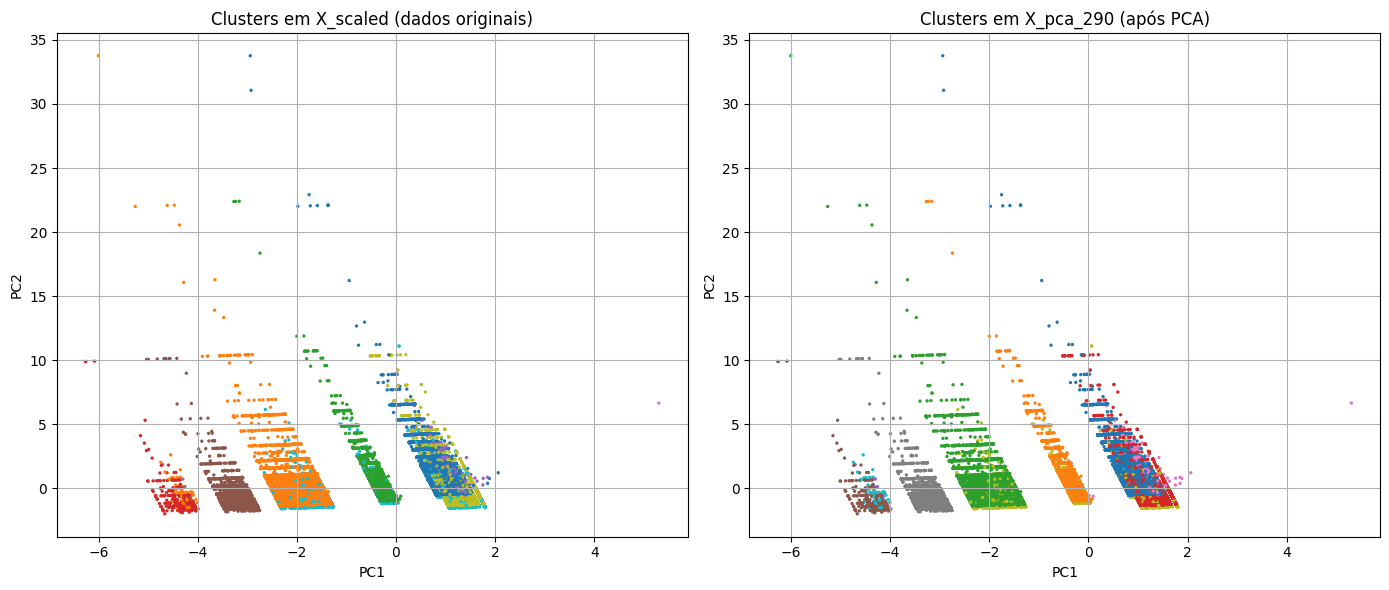

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA para visualiza√ß√£o em 2D
pca_vis = PCA(n_components=2, random_state=42)
X_scaled_2d = pca_vis.fit_transform(X_scaled)
X_pca_290_2d = pca_vis.fit_transform(X_pca_290)

# Visualiza√ß√£o dos clusters
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Clusters nos dados originais
axes[0].scatter(X_scaled_2d[:, 0], X_scaled_2d[:, 1], c=labels_original, cmap='tab10', s=2)
axes[0].set_title('Clusters em X_scaled (dados originais)')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].grid(True)

# Clusters nos dados ap√≥s PCA
axes[1].scatter(X_pca_290_2d[:, 0], X_pca_290_2d[:, 1], c=labels_pca_k_means, cmap='tab10', s=2)
axes[1].set_title('Clusters em X_pca_290 (ap√≥s PCA)')
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].grid(True)

plt.tight_layout()
plt.show()


Como foi poss√≠vel observar n√£o foi encontrada uma Silhouette Score relevante para o K-means. Logo, tentaremos outra abordagem com DB-Scan

In [ ]:
from sklearn.cluster import DBSCAN

# Par√¢metros do DBSCAN (voc√™ pode ajustar esses valores)
eps = 2.0           # raio m√°ximo de vizinhan√ßa
min_samples = 100     # n√∫mero m√≠nimo de pontos para formar um cluster

# Aplica DBSCAN aos dados ap√≥s PCA
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels_dbscan = dbscan.fit_predict(X_pca_290)

# N√∫mero de clusters (ignora ru√≠do rotulado como -1)
n_clusters = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
n_noise = np.sum(labels_dbscan == -1)

print(f"[DBSCAN] N√∫mero de clusters encontrados: {n_clusters}")
print(f"[DBSCAN] N√∫mero de pontos rotulados como ru√≠do: {n_noise}")

[DBSCAN] N√∫mero de clusters encontrados: 7
[DBSCAN] N√∫mero de pontos rotulados como ru√≠do: 296


In [ ]:
if n_clusters > 1:
    sil_dbscan = silhouette_score(X_pca_290, labels_dbscan)
    print(f"[DBSCAN] Silhouette Score: {sil_dbscan:.4f}")
else:
    print("[DBSCAN] N√£o foi poss√≠vel calcular o Silhouette Score (menos de 2 clusters).")

# Adiciona os r√≥tulos ao DataFrame original
df_dbscan = final_df.copy()
df_dbscan['cluster'] = labels_dbscan

[DBSCAN] Silhouette Score: 0.6028


Agora vamos tentar realizar a clusteriza√ß√£o com as tags dos jogos incluidas nesse dataset. Usar as tags gerou baixo silhouete score

In [ ]:
df_metadata = pd.read_json('games_metadata.json', lines=True)
df_tags = df_metadata[['app_id','tags']].explode('tags')
one_hot_tags = pd.get_dummies(df_tags['tags'])
one_hot_tags = df_tags[['app_id']].join(one_hot_tags)
one_hot_encoded = one_hot_tags.groupby('app_id').max().reset_index()
one_hot_encoded


app_id  1980s  1990's   2.5D     2D  2D Fighter  2D Platformer  \
0           10   True    True  False  False       False          False   
1           20  False    True  False  False       False          False   
2           30  False   False  False  False       False          False   
3           40  False    True  False  False       False          False   
4           50  False    True  False  False       False          False   
...        ...    ...     ...    ...    ...         ...            ...   
50867  2581740  False   False  False  False       False          False   
50868  2585630  False   False  False  False       False          False   
50869  2585640  False   False  False  False       False          False   
50870  2593020  False   False  False  False       False          False   
50871  2599300  False   False  False  False       False          False   

       360 Video     3D  3D Fighter  ...  Well-Written  Werewolves  Western  \
0          False  False       False  ...         False       False    False   
1          False  False       False  ...         False       False    False   
2          False  False       False  ...         False       False    False   
3          False  False       False  ...         False       False    False   
4          False  False       False  ...         False       False    False   
...          ...    ...         ...  ...           ...         ...      ...   
50867      False  False       False  ...         False       False    False   
50868      False  False       False  ...         False       False    False   
50869      False  False       False  ...         False       False    False   
50870      False  False       False  ...         False       False    False   
50871      False  False       False  ...         False       False    False   

       Wholesome  Word Game  World War I  World War II  Wrestling  Zombies  \
0          False      False        False         False      False    False   
1          False      False        False         False      False    False   
2          False      False         True          True      False    False   
3          False      False        False         False      False    False   
4          False      False        False         False      False    False   
...          ...        ...          ...           ...        ...      ...   
50867      False      False        False         False      False    False   
50868      False      False        False         False      False    False   
50869      False      False        False         False      False    False   
50870      False      False        False         False      False    False   
50871      False      False        False         False      False    False   

       eSports  
0         True  
1        False  
2        False  
3        False  
4        False  
...        ...  
50867    False  
50868    False  
50869    False  
50870    False  
50871    False  

[50872 rows x 442 columns]

In [ ]:
final_df_tags = final_df.merge(one_hot_encoded, on='app_id', how='inner')


In [ ]:
X = final_df_tags.drop(columns=['app_id'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


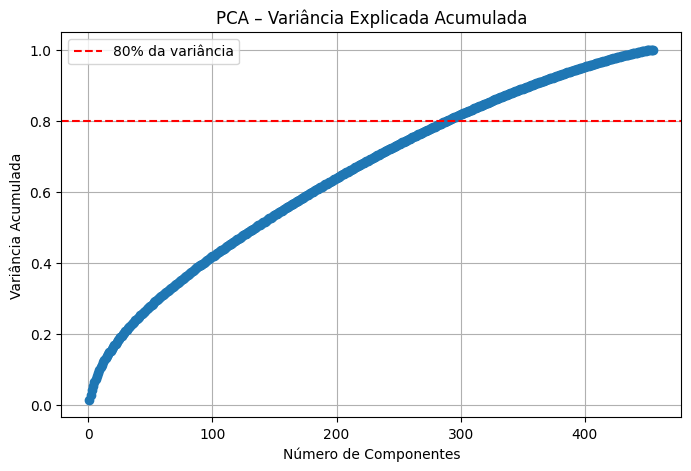

In [ ]:
pca_full = PCA().fit(X_scaled)
explained_var = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_var) + 1), explained_var, marker='o')
plt.axhline(y=0.8, color='r', linestyle='--', label='80% da vari√¢ncia')
plt.xlabel('N√∫mero de Componentes')
plt.ylabel('Vari√¢ncia Acumulada')
plt.title('PCA ‚Äì Vari√¢ncia Explicada Acumulada')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
pca_290 = PCA(n_components= 300, random_state=42)
X_pca_290 = pca_290.fit_transform(X_scaled)
total_var = pca_290.explained_variance_ratio_.sum()
print(f"Vari√¢ncia total explicada com 290 componentes: {total_var:.4f} ({total_var*100:.2f}%)")

Vari√¢ncia total explicada com 290 componentes: 0.8178 (81.78%)


In [ ]:
k = 10

# B. K-Means com os dados reduzidos por PCA
kmeans_pca = KMeans(n_clusters=k, random_state=42, n_init='auto')
labels_pca = kmeans_pca.fit_predict(X_pca_290)
sil_pca = silhouette_score(X_pca_290, labels_pca)
print(f"[PCA-290]  Silhouette Score com k={k}: {sil_pca:.4f}")

[PCA-290]  Silhouette Score com k=10: 0.1051


Agora testar o uso de um subconjunto das tags mais relevantes para testar o impacto delas na gera√ß√£o dos clusters.


In [ ]:
columns = final_df.columns.tolist()
principal_tags = one_hot_tags.sum(axis=0).sort_values(ascending=False).head(6)
principal_columns = columns + principal_tags.index.tolist()

final_df_selected_tags = final_df_tags[principal_columns].fillna(0)

final_df_selected_tags['Singleplayer'] = final_df_selected_tags['Singleplayer'].astype(int)
final_df_selected_tags['Indie'] = final_df_selected_tags['Indie'].astype(int)
final_df_selected_tags['Action'] = final_df_selected_tags['Action'].astype(int)
final_df_selected_tags['Adventure'] = final_df_selected_tags['Adventure'].astype(int)
final_df_selected_tags['Casual'] = final_df_selected_tags['Casual'].astype(int)

In [ ]:
X = final_df_selected_tags.drop(columns=['app_id'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k = 10

kmeans_original = KMeans(n_clusters=k, random_state=42, n_init='auto')
labels_original = kmeans_original.fit_predict(X_scaled)
sil_original = silhouette_score(X_scaled, labels_original)
print(f"[ORIGINAL] Silhouette Score com k={k}: {sil_original:.4f}")


[ORIGINAL] Silhouette Score com k=10: 0.2445


Podemos ver que mesmo selecionando um subconjunto das tags mais relevantes n√£o houve uma melhora no silhouette score. Testaremos agora utilizar apenas a tag mais relevante:

In [ ]:
columns = final_df.columns.tolist()
principal_tags = one_hot_tags.sum(axis=0).sort_values(ascending=False).head(2)
principal_columns = columns + principal_tags.index.tolist()

final_df_selected_tags = final_df_tags[principal_columns].fillna(0)

final_df_selected_tags['Singleplayer'] = final_df_selected_tags['Singleplayer'].astype(int)


In [ ]:
X = final_df_selected_tags.drop(columns=['app_id'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k = 10

kmeans_original = KMeans(n_clusters=k, random_state=42, n_init='auto')
labels_original = kmeans_original.fit_predict(X_scaled)
sil_original = silhouette_score(X_scaled, labels_original)
print(f"[ORIGINAL] Silhouette Score com k={k}: {sil_original:.4f}")


[ORIGINAL] Silhouette Score com k=10: 0.4806


√â poss√≠vel notar que mesmo selecionando apenas a tag mais comum dentre os jogos a m√©trica ainda √© pior do que a selecionada inicialmente. Por fim, testaremos utilizar apenas os atributos num√©ricos dos jogos, excluindo a categoria das an√°lises e as tags, filtrando ao m√°ximo a quantidade de atributos.

In [ ]:

principal_columns = ['positive_ratio','user_reviews','price_final','price_original','discount']

final_df_least_columns = final_df[principal_columns].fillna(0)



In [ ]:
X = final_df_least_columns

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k = 10

kmeans_original = KMeans(n_clusters=k, random_state=42, n_init='auto')
labels_original = kmeans_original.fit_predict(X_scaled)
sil_original = silhouette_score(X_scaled, labels_original)
print(f"[ORIGINAL] Silhouette Score com k={k}: {sil_original:.4f}")


[ORIGINAL] Silhouette Score com k=10: 0.3611


Por fim, podemos notar que apesar dos diversos testes realizados o melhor resultado, considerando o silhoutte score, foi utilizando apenas os dados presentes na tabela games que n√£o possu√≠a informa√ß√µes sobre as categorias dos jogos, mas sim atributos sobre pre√ßo e estat√≠sticas das an√°lises relativas ao jogo. Este √∫ltimo teste demonstrou que apesar do aumento de dimensionalidade gerado pelo uso da categoria das an√°lises ('muito bom', 'bom', 'ruim', etc) no algoritmo de clusteriza√ß√£o ele se demontrou importante ao gerar um silhouette score melhor que o caso onde foi utilizada uma quantidade menor de atributos.


## Evaluation

Vamos tentar avaliar os dados dentro desses clusters

In [ ]:
games_relevant_columns = ['app_id', 'positive_ratio', 'user_reviews', 'price_final', 'price_original', 'discount']

# 2. Crie DataFrame apenas com essas colunas
df_relevant = final_df[games_relevant_columns].copy()

# 3. Adicione os r√≥tulos de cluster
df_relevant['cluster'] = labels_pca_k_means  # ou labels_original, se preferir

In [ ]:
# 4. Calcule a m√©dia por cluster

cluster_summary = df_relevant.groupby('cluster').mean(numeric_only=True)
print("üìä M√©dias por cluster:")
print(cluster_summary)

üìä M√©dias por cluster:
               app_id  positive_ratio  user_reviews  price_final  \
cluster                                                            
0        9.897074e+05       88.830402   2531.982334    10.654950   
1        9.894190e+05       74.577247    920.236678     9.461046   
2        9.504518e+05       57.544989    465.624206     9.140841   
3        1.289081e+06       91.251311     21.908754     6.788531   
4        1.098200e+06       14.214286  15895.857143     8.600000   
5        9.797953e+05       11.851485     18.353135     8.199736   
6        9.481905e+05       95.955066  40164.180617    11.996167   
7        9.070683e+05       31.276906    262.856679     8.075890   
8        1.075669e+06       79.091491    599.977287     2.791647   
9        1.027496e+06       13.633333    143.950000    10.217500   

         price_original   discount  
cluster                             
0              9.739448   0.786879  
1              9.231413   1.825265  
2        

Cluster 0: Jogos bem avaliados (89%), com bom volume de reviews e pre√ßo moderado. Produtos s√≥lidos e confi√°veis.

Cluster 1: Avalia√ß√£o mediana (75%) e reviews moderados. Jogos medianos em todos os aspectos.

Cluster 2: Jogos com baixa avalia√ß√£o (57%) e poucos reviews. Pouca qualidade percebida.

Cluster 3: Jogos altamente avaliados (91%) e baratos, mas ainda desconhecidos. Boas oportunidades escondidas.

Cluster 4: Altamente populares (15k reviews), mas muito mal avaliados (14%). Jogos criticados apesar da fama.

Cluster 5: Pior avalia√ß√£o (12%) e quase nenhum review. Jogos irrelevantes e mal aceitos.

Cluster 6: Jogos excelentes (96%) e extremamente populares. Os grandes sucessos da plataforma.

Cluster 7: Jogos mal avaliados (31%) e pouco engajamento. Baixa reputa√ß√£o geral.

Cluster 8: Avalia√ß√£o boa (79%) com pre√ßo muito baixo e alt√≠ssimo desconto. Jogos acess√≠veis e com bom custo-benef√≠cio.

Cluster 9: Jogos pouco populares e mal avaliados (14%), com pre√ßo alto. Prov√°vel m√° precifica√ß√£o.

## Conclus√£o final
Por fim, ap√≥s realizar v√°rios testes utilizando diferentes subconjuntos dos dados que estavam dispon√≠veis para an√°lise foi poss√≠vel notar que as principais informa√ß√µes para a obten√ß√£o dos melhores resultados ao realizar o clustering foram as que estavam no arquivo 'games.csv' que continham informa√ß√µes b√°sicas sobre os jogos como pre√ßo, n√∫mero de an√°lises e resumo estat√≠stico das an√°lises.

Outro resultado importante a ser notado √© que, apesar do melhor resultado apresentar um silhoutte score de aproximadament 0.62 para um  clustering em dados com 14 atributos que n√£o √© necessariamente baixo mas n√£o representa uma sustenta√ß√£o alta para a qualidade da separa√ß√£o dos agrupamentos gerados, foi poss√≠vel gerar interpreta√ß√µes razo√°veis para os grupos gerados, o que demonstra que o agrupamento na pr√°tica se tornou efetivo para resolver o problema proposto que era entender quais padr√µes de jogos estavam presentes na plataforma.

Enfim, considerando a limita√ß√£o dos dados utilizados foi poss√≠vel gerar informa√ß√µes relevantes sobre os conte√∫dos que circulam na plataforma Steam, que podem ser √∫teis para a an√°lise do comportamento da empresa em rela√ß√£o tanto ao p√∫blico, no que se diz respeito a entender melhor quais jogos s√£o desenvolvidos para cada perfil de usu√°rio, quanto em rela√ß√£o √†s desenvolvedoras, no que diz respeito √† direcionar seus produtos para o p√∫blico-alvo adequado ao seu perfil, de forma a melhorar os resultados de um lan√ßamento ou at√© mesmo de um jogo j√° existente na plataforma.